## Pythonはすべてがオブジェクト

**Pythonはすべてのデータ型がオブジェクトである**

それぞれのデータ型は以下のクラスから作られたオブジェクト

文字列　→　class str

整数　　→　class int

リスト　→　class list

文字列型のデータは、strクラスのオブジェクトなので**メソッドを持つ**

In [ ]:
print(type("Hello"))   #type()関数でどのクラスのオブジェクトか確認できる
print("Hello".upper()) #メソッドの呼び出し

<class 'str'>
HELLO


各データ型がどんなメソッドを持つのか：<br>
[公式ドキュメント（str型のメソッド）](https://docs.python.org/ja/3/library/stdtypes.html#string-methods)

# 値渡しと参照渡し

関数に引数を渡す方法には、主に**値渡し**と**参照渡し**の2つがあり、

現代のプログラミング言語のほとんどは、 保守性の向上のメリットから、**値渡し**を採用している





値渡し・参照渡しとは何か？メリット・デメリットは何か？を理解するには、

まず**オブジェクトとメモリの関係**について知る必要がある

## オブジェクトの分類

Pythondで扱うオブジェクトは、大きく次の２軸で分類することができる



*   コンテナオブジェクトかどうか
*   ミュータブル（mutable）か、イミュータブル（immutable）か

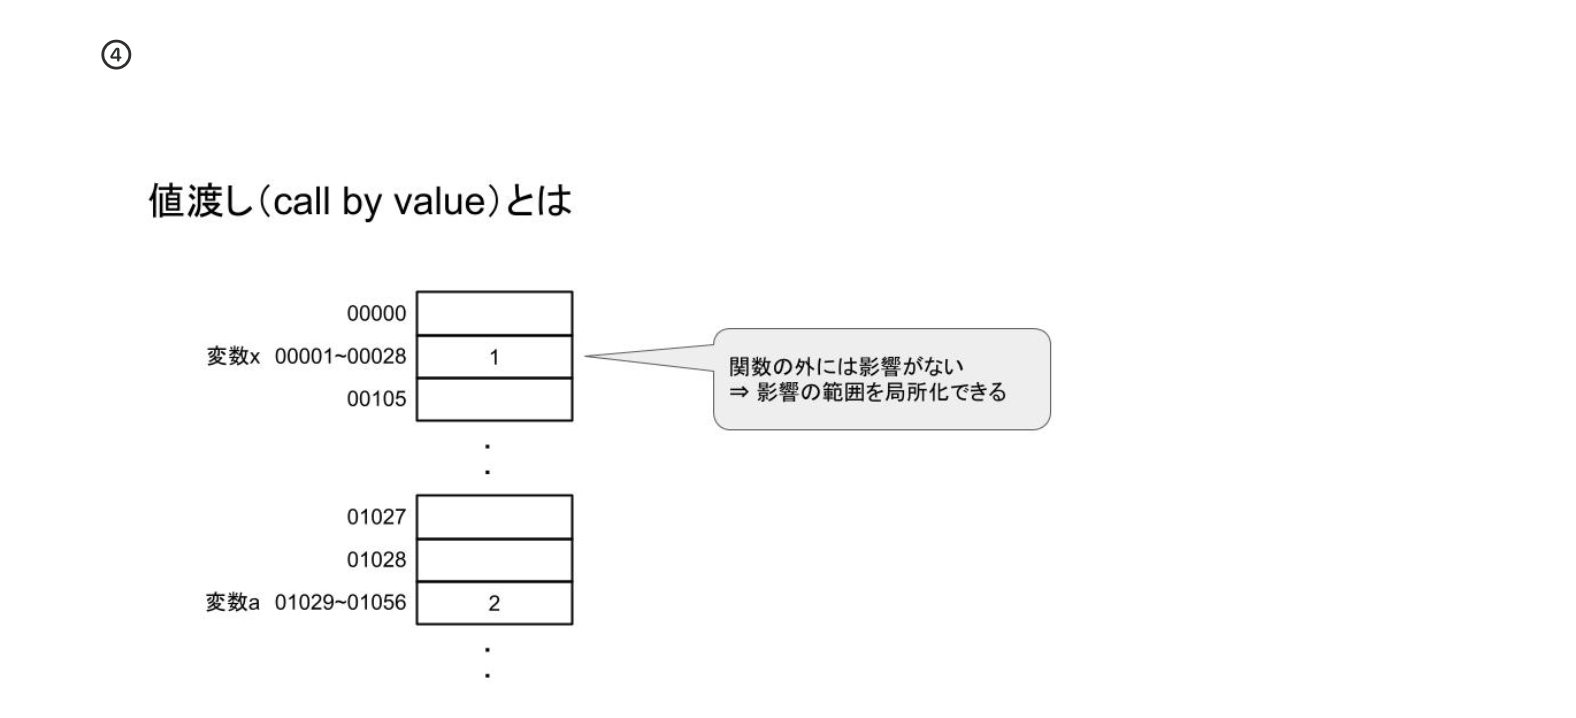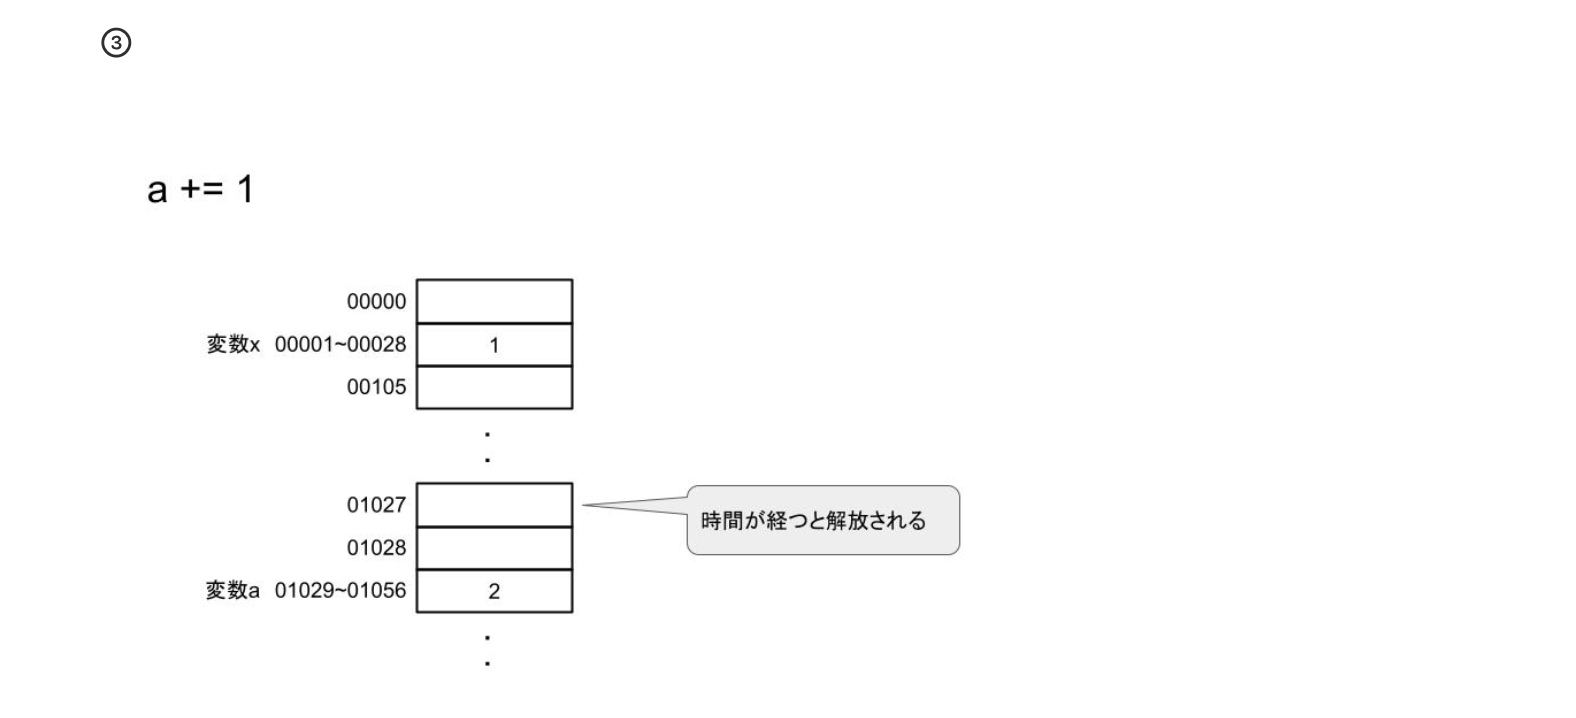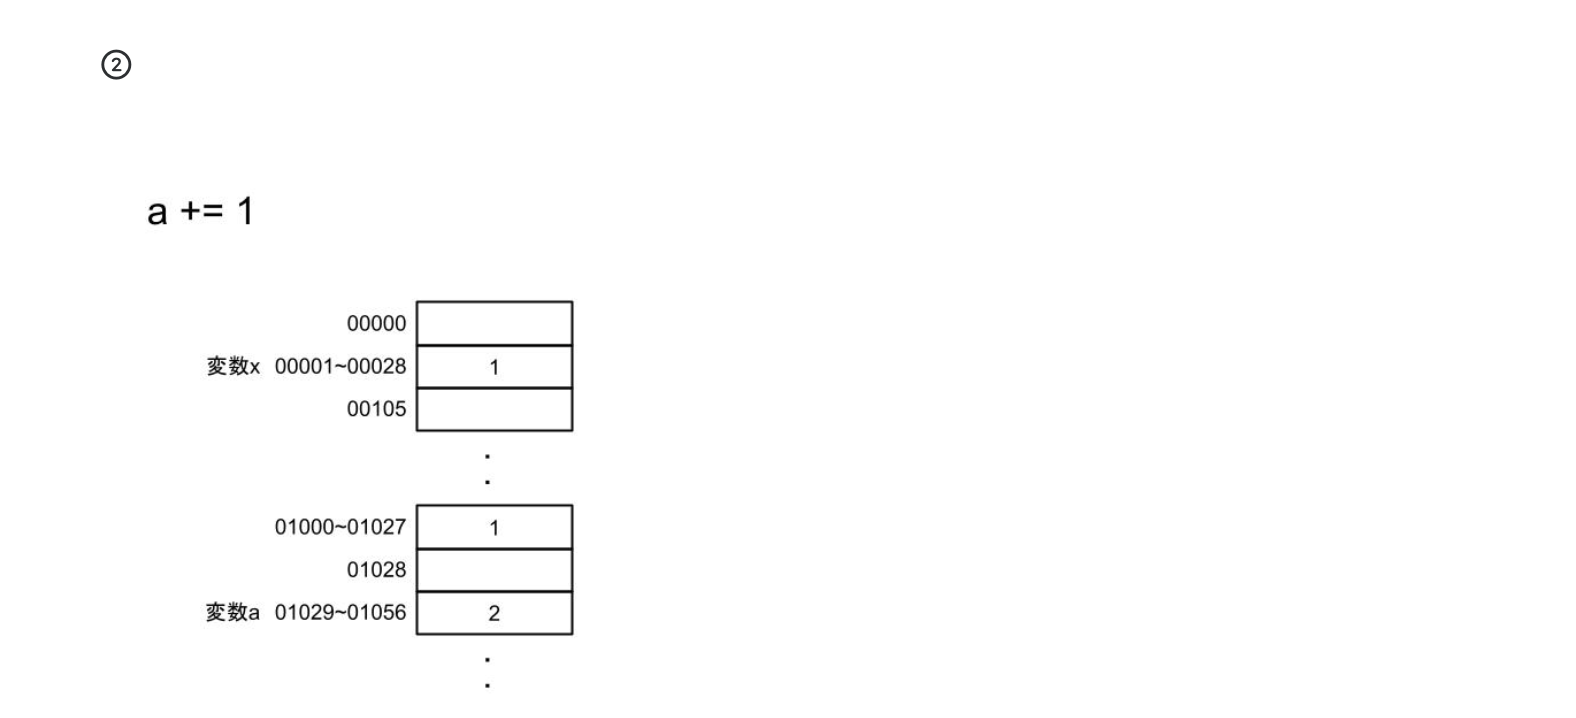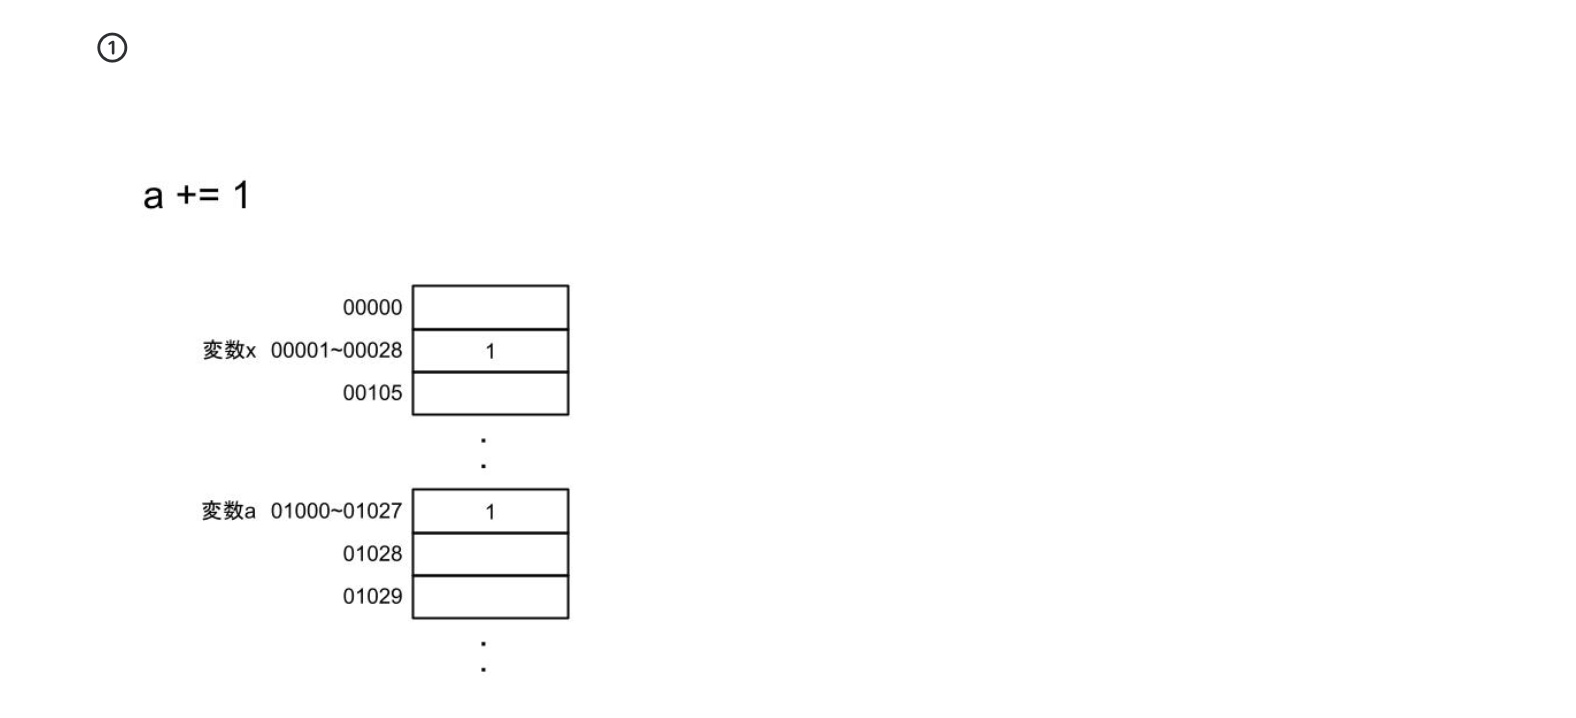






### コンテナオブジェクトとは

**コンテナオブジェクト**: 他のオブジェクトへの参照を持つオブジェクト<br>
リストや辞書のように、要素として**複数のオブジェクトを持てるオブジェクト**のこと



Pythonの組み込みのコンテナオブジェクト（コンテナデータ型）としては、

リスト型（list）、辞書型（dict）、集合型（set）、タプル型（tuple）がある

In [ ]:
hoge_list = [1,2,3] # リスト型
hoge_dict= {'first': 1, "second": 2, "third": 3} # 辞書型
hoge_set = {1,2,3} # 集合型
hoge_tuple = (1,2,3) # タプル型

集合型は順序がない上に、要素もユニーク（重複がない）

In [ ]:
hoge_set = {1,2,3} # 集合型
print(hoge_set[0]) # 要素に順序はなく、インデックスでアクセスできない

TypeError: ignored

In [ ]:
foo1_set = {1,2,2,3,3,3} # 要素はユニーク（重複がない）
print(foo1_set)
print({1,2,2,3,3,3} == {1,2,3}) # 同値

foo2_set = {4,2,1,3} # 順序がない
print(foo2_set)
print({4,2,1,3} == {1,2,3,4}) # 同値

{1, 2, 3}
True
{1, 2, 3, 4}
True


集合型は主に、以下のような用途で使われる

*   集合に属しているかの高速なテスト
*   リストなどからの重複の排除
*   共通集合・和集合・差・対称差といった数学的な演算の計算

In [ ]:
# setの使用例（リストでも実現できるが、集合の方がリストよりも高速）

def check_existence(n):
  hoge_set = {1,2,3,5,7}
  if n in hoge_set:
    print('集合に含まれます')
  else:
    print('集合に含まれません')

check_existence(3)

集合に含まれます


リストとタプルの違いは、要素の変更が可能（ミュータブル）
かどうか

### ミュータブル（mutable）とイミュータブル（immutable）

オブジェクトには**変更可能（mutable）な型**と、**変更不可能（immutable）な型がある**

**ミュータブルなデータ型**　　→　リスト型（list）、辞書型（dict）、集合型（set）など

**イミュータブルなデータ型**　→　数値型（int,floatなど）、文字列型（str）、タプル型（tuple）など

In [ ]:
hoge_list = [1,2,3] # リスト型
hoge_list[0] = 0 # リストはミュータブルなので要素の変更が可能
print(hoge_list)

[0, 2, 3]


In [ ]:
hoge_tuple = (1,2,3) # タプル型
hoge_tuple[0] = 0 # tupleはイミュータブルなので要素の変更ができない

TypeError: ignored

イミュータブル（変更不可能）なオブジェクトも、

変数への再代入による、値の**交換**は可能


In [ ]:
a = 1
a = 2 # 再代入して変数の値を交換
print(a)

2


1という値のオブジェクト自体が変更されているわけではなく、

変数aに値が2のオブジェクトが格納されただけ

1というオブジェクトの値が、2に変更されたわけではない

In [ ]:
hoge_tuple = (1,2,3)
hoge_tuple = (2,3,4) # tupleも値の交換は可能
print(hoge_tuple)

(2, 3, 4)


↓イミュータブルが変更は不可だが、交換は可能な理由

## オブジェクトとメモリ

コンテナオブジェクトと、ミュータブル・イミュータブルについて深く理解するには、

Pythonでオブジェクトを扱う際に、**メモリがどう使われているのか？**を知る必要がある

⇒ OOP（Object Oriented Programming）と同様に、プログラミング中級者になるためには理解必須


Pythonにおいて、すべてのオブジェクトは、**型・値・アドレス**を持つ

*   **型**：int型やstr型など
*   **値**：1や'Hello'など
*   **アドレス**；オブジェクトがメモリのどの場所に格納されているか

コンピュータには、**メモリ**と呼ばれるデータを格納するための箱が用意されており、

メモリには場所ごとに**アドレス**（住所）が割り振られている








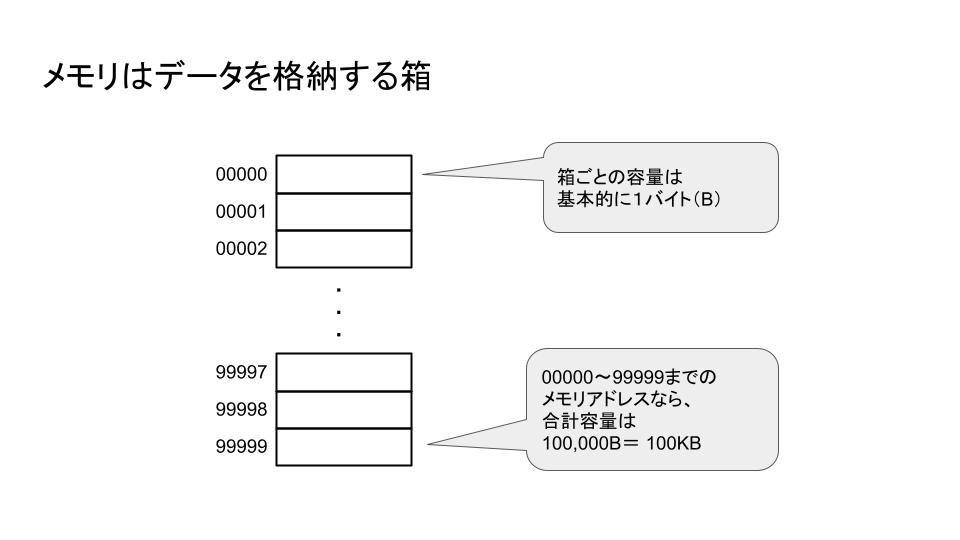

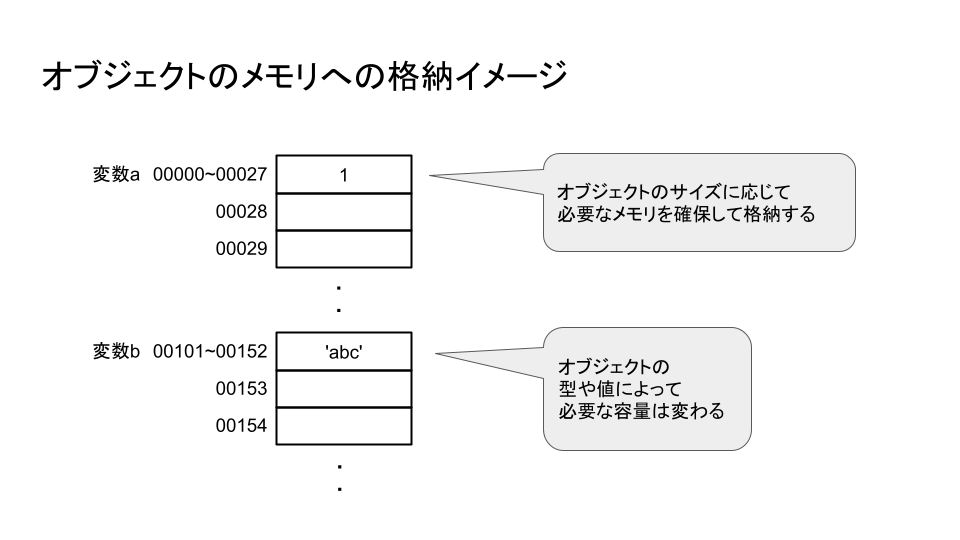

https://zenn.dev/yukinarit/articles/afb263bf68fff2

変数は、具体的なメモリアドレスを隠蔽して、

人間にとってわかりやすい文字でアドレスを扱えるようにするための仕組み、と言える

オブジェクトによって、格納に必要な容量は異なる

同じデータ型でも、値や実行環境によっても変わる

オブジェクトの容量を確認するには、**sysモジュールのgetsizeof()**が使える

In [ ]:
import sys

print(sys.getsizeof(1)) # int型
print(sys.getsizeof(5)) # int型
print(sys.getsizeof('abc')) # str型
print(sys.getsizeof([1,2,3])) # list型
print(sys.getsizeof({'first':1, "second":2, "third":3})) # dict型
print(sys.getsizeof({1,2,3})) # set型

28
28
52
88
232
216


オブジェクトのメモリアドレスを知るには、**[id()](https://docs.python.org/ja/3/library/functions.html#id)**が使える

id()では、メモリの先頭番号が表示される

In [ ]:
a = 1
b = 'abc'
c = [1,2,3]

print(id(a))
print(id(b))
print(id(c))

140309000378672
140308999741040
140307735421824


## メモリの観点でコンテナオブジェクトを理解する

他のオブジェクトへの**参照**を持つオブジェクトのことをコンテナオブジェクトという

⇒ 参照とは、メモリアドレスのこと

コンテナオブジェクト以外の場合は、**値**がメモリに入っており、

コンテナオブジェクトの場合は、**要素のメモリアドレス**が入っている

とイメージしよう




例えば、

```
list_a = [1,2,3]
```

このリストなら、以下の画像のイメージ

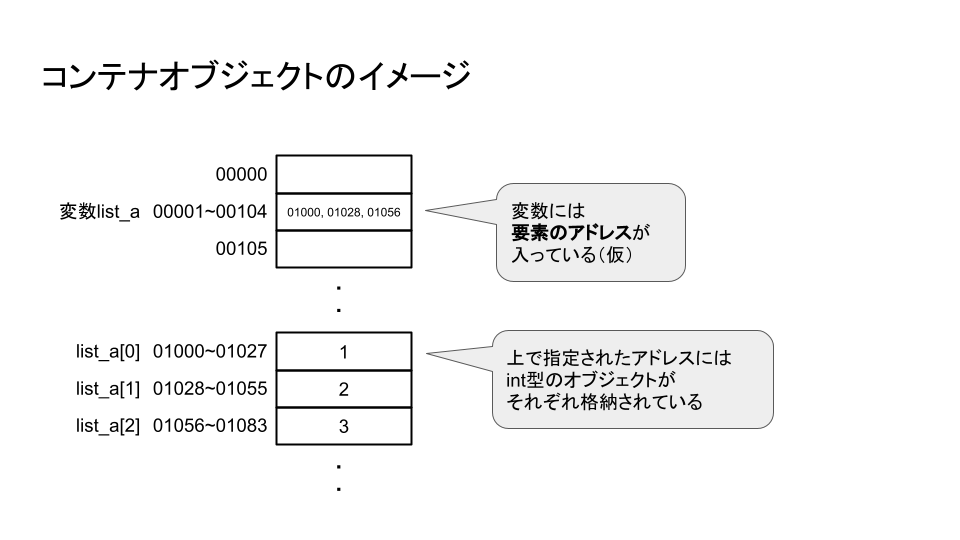

## メモリの観点でミュータブルとイミュータブルを理解する

ミュータブルなオブジェクトは、

**アドレス**を変えずに**値**を変えることができるオブジェクトと言える

例えばリスト型なら、

アドレスはそのままで、要素の値を変更することができる

In [ ]:
m = [1]
print(id(m))
print(m)

m[0] = 2
print(id(m)) # リストのオブジェクトのアドレスは変わらず
print(m) # リストのオブジェクトの値は変わっている

139982022073664
[1]
139982022073664
[2]


一方で、整数型ならアドレスを変えずに値を変えることはできず、

値が変わるならアドレスも変わる（オブジェクトの交換）

In [ ]:
i = 1
print(id(i))
i = 2
print(id(i))
i = 2
print(id(i))

132964823826672
132964823826704
132964823826704


In [ ]:
m = [1]
print(id(m))
print(id(m[0]))

m[0] = 2
print(id(m)) # リストのオブジェクトのアドレスは変わらず
print(id(m[0])) # m[0]が指すアドレスが変わっている

139981260652288
139982508130544
139981260652288
139982508130576


## 値渡し（call by value）とは


関数に引数の値を**コピーして渡す**方法



```
def hoge(a):
  a += 1

x = 1
hoge(x)
print(x)  # 出力は 1
```



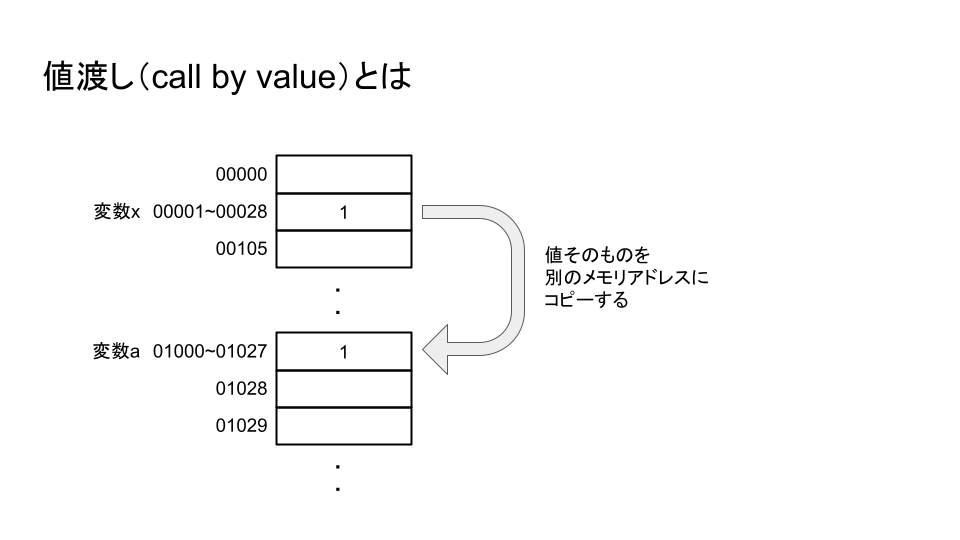

int型はイミュータブルなオブジェクトであるため、

新たなメモリアドレス（例えば、01029~01056）に、2が格納され、

変数aがそのメモリアドレスを指すかたちになります。
 ※レクチャーの補足参照

関数hogeには変数xそのものではなくコピーした値を渡すので、

関数hogeが実行されても変数xの値は変わらない：影響範囲を局所化できる

## 参照渡し（call by reference）とは



関数に引数の**値への参照を渡す**方法


```
def hoge(a):
  a += 1

x = 1
hoge(x)
print(x)  # 出力は 2
```

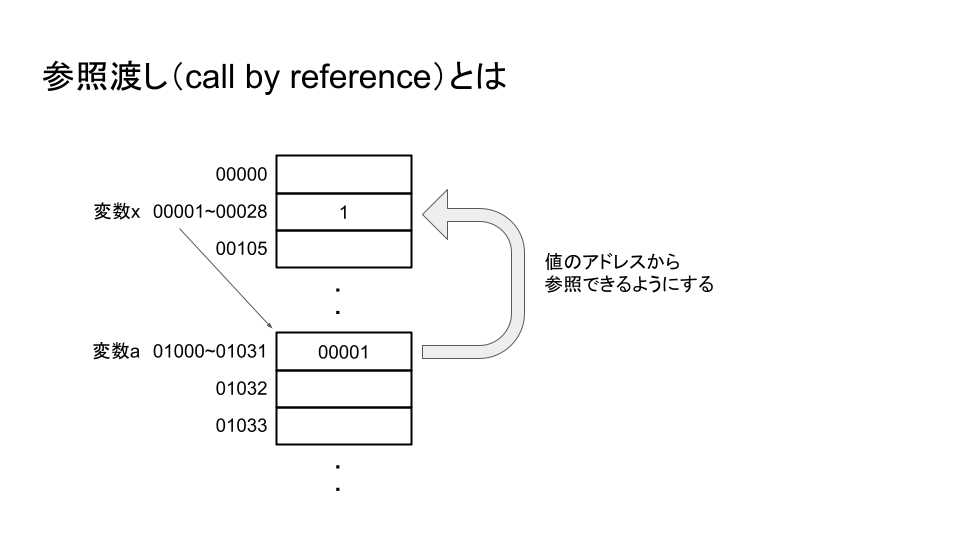

関数hogeには変数xそのもの（変数xのメモリアドレス）を渡すので、

関数hogeが実行されると変数xの値が変わる

## 参照渡しの問題点、値渡しのメリット

同一の値を複数の場所から参照するようにすると、

値がどこから変更されるか予測しづらい上に、変更された場合、変更の範囲がとても大きくなってしまう

⇒ **グローバル変数と似たような問題**が発生する

値渡しをすると、データの共有を最小限にできるので、保守性が向上する

⇒ ローカル変数と同じようなメリット


参照渡しの唯一のメリットは、オブジェクトを共有することにより、

オブジェクト生成の時間がかからなかったり、メモリを節約できたりするため、

**パフォーマンス的に値渡しよりも優れる場合がある**



現代のソフトウェア開発環境では、コンピュータの性能よりも、人間の注意力がボトルネックになる

⇒ プログラムが複雑になることのデメリットの方が大きくなることが多い

⇒ 最近のプログラミング言語のほとんどでは、値渡しが採用されている

## Pythonは値渡し

Pythonも、値渡しのプログラミング言語





In [ ]:
#先ほど掲載した、値渡しの場合の振る舞いのコード

def hoge(a):
  a += 1

x = 1
hoge(x)
print(x)  # 出力は 1、もし参照渡しなら 2　になる

1


Web上の記事では、「Pythonは参照渡しである」との記述も多いが、これは間違い

勘違いしやすいのは、以下のコードのような振る舞いになるから


In [ ]:
def foo1(a):
  a[0] = 0

x = [1,2]
foo1(x)
print(x) # 中身が変更されている

[0, 2]


関数内での操作によって、引数で渡したリストが変更されている

⇒ 引数に渡した値そのものが変更されているので、参照渡し？

⇒ 実際には、**オブジェクトの参照を値渡し**している

### 参照の値渡し（call by sharing）とは

参照の値渡し（call by sharing）について理解するために、

CPythonにおいてリストがどのように実装されているかを知ろう

CPythonとは？　-> C言語で書かれている

⇒ Pythonのいくつかある実装のひとつで、もっとも代表的なもの。C言語で実装されている。

*   Python：言語仕様
*   CPythonやJythonなど：Pythonの具体的な実装

Pythonで定められている仕様の実現方法が、実装によって異なる場合もある

例えば、

```
list_a = [1,2]
```
このリストでは、以下の図のようにメモリが使われている


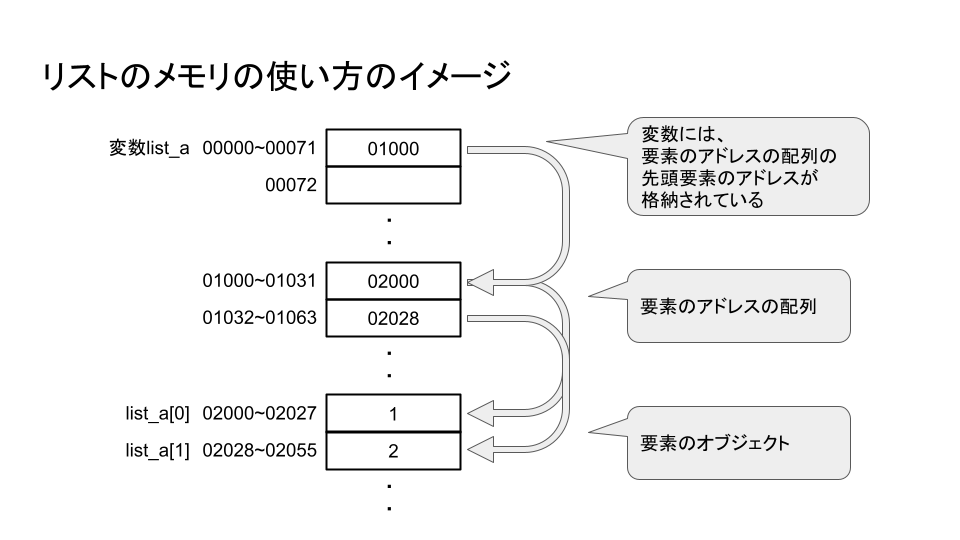



```
list_a = [1,2]
list_a[0] = 0
```

上記のように要素の値を交換した場合、以下の図のようになる


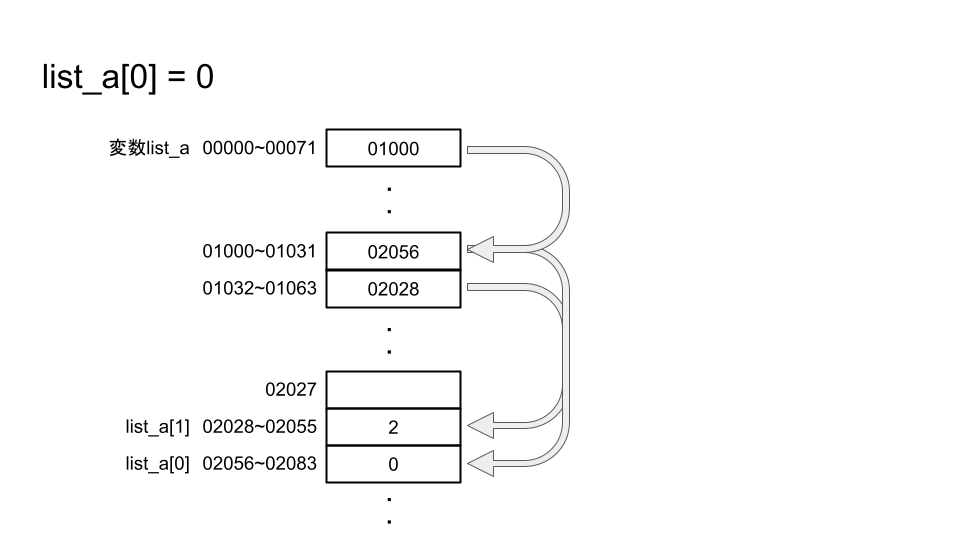

参照の値渡しとは？

⇒ その名の通り、**参照（メモリアドレス）を値渡し**する

In [ ]:
def foo1(a):
  a[0] = 0

x = [1,2,3]
foo1(x)
print(x) # 中身が変更されている

[0, 2, 3]


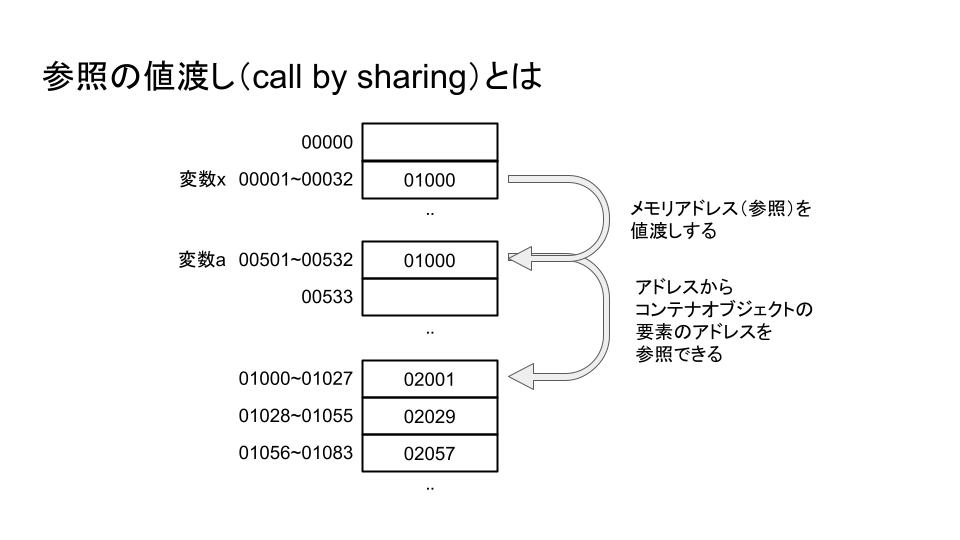

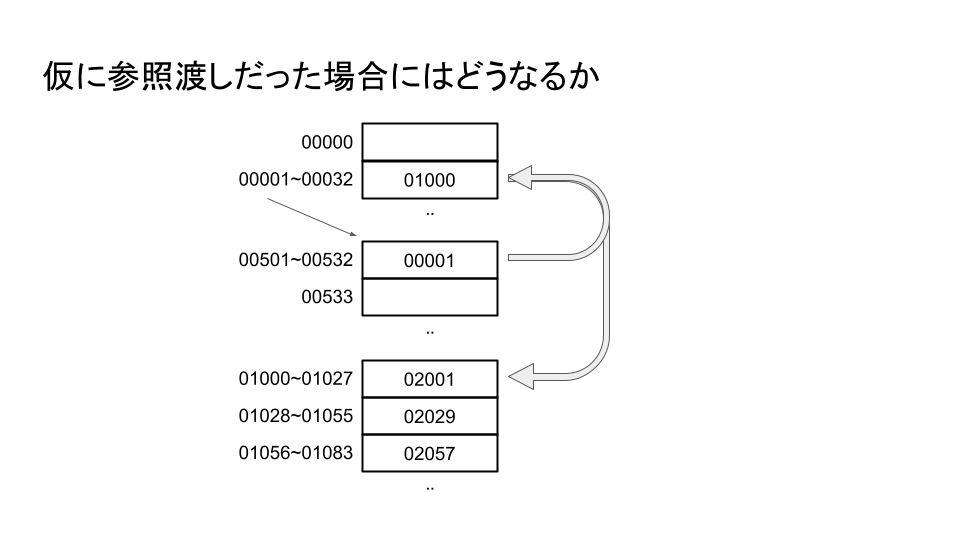

仮に参照渡しならば、以下のコードの挙動は説明できない

In [ ]:
def foo2(a):
  a = [4,5,6]

x = [1,2,3]
foo2(x)
print(x) # 変更されない

[1, 2, 3]


より詳しく知りたい方は、公式ドキュメントの以下のページを参照してください

*   [3. データモデル](https://docs.python.org/ja/3/reference/datamodel.html?highlight=mutable)
*   [4.7. 関数を定義する](https://docs.python.org/ja/3/tutorial/controlflow.html#defining-functions)
*   [CPythonでリストはどのように実装されているのですか？](https://docs.python.org/ja/3/faq/design.html#how-are-lists-implemented-in-cpython)

## おまけ：is演算子と==演算子

オブジェクトとメモリの関係を理解できると、

is 演算子と == 演算子の違いも、すっきりと理解できる




*   同じアドレスのオブジェクト　⇒　同一（is 演算子がTrue）
*   同じ値のオブジェクト　⇒　同値（== 演算子がTrue）

In [ ]:
list1 = [1,2,3]
list2 = [1,2,3]

print(id(list1))
print(id(list2))

print(list1 is list2)
print(list1 == list2)

140665654761280
140665189216768
False
True


イミュータブルなオブジェクトなら、値が変更されることはないので、

同じオブジェクトを参照しても問題が発生しない（むしろ、パフォーマンス的に優れる）

